# Read EPANET result files generated by MIKE+

In this notebook we give examples how to read EPANET result files **resx** generated by MIKE+. Most of the functionality is the same as reading res1d files, which is described in [res1d.ipynb](res1d.ipynb).

In [1]:
from mikeio1d import Res1D
from mikeio1d.query import QueryDataNode, QueryDataReach

## EPANET resx file

Read entire res file into a data frame. Here we use results from a standard **Net1.inp** (EPANET Example Network 1) distributed together with EPANET 2.2 and imported into MIKE+.

In [2]:
file_path = "../tests/testdata/epanet.resx"
res = Res1D(file_path)
df = res.read()

Let's peek at the full data frame coming from EPANET result.

In [3]:
df.head()

,Volume:9,Volume Percentage:9,Volume:2,Volume Percentage:2,Pump efficiency:9,Pump energy costs:9,Pump energy:9
2022-10-13 00:00:00,0.0,0.0,6806.106934,80.000000,75.0,0.0,95.844238
2022-10-13 01:00:00,0.0,0.0,6980.124023,82.045425,75.0,0.0,96.065292
2022-10-13 02:00:00,0.0,0.0,7150.145020,84.043869,75.0,0.0,96.188499
2022-10-13 03:00:00,0.0,0.0,7267.672852,85.425308,75.0,0.0,96.307945
2022-10-13 04:00:00,0.0,0.0,7382.457520,86.774513,75.0,0.0,96.357651


The available quantities are:

In [4]:
res.quantities

['Volume',
 'Volume Percentage',
 'Pump efficiency',
 'Pump energy costs',
 'Pump energy']

From the above list the following quantities are defined on pipes (reaches) or more precisely a pump structure:
* Pump efficiency
* Pump energy costs
* Pump energy

Quantities defined on junctions (nodes):
* Volume
* Volume Percentage

Here we retrieve pump efficiency (ID **9**), which has connecting junctions **2** and **9**. Note that we cannot use the `pipe_data_item.StartNodeIndex` due to problem in generated **resx** files, which has this connectivity information missing.

In [5]:
pipe_id = '9'
pipe_data_item = res.reaches[pipe_id]
# node_start = res.data.Nodes[pipe_data_item.StartNodeIndex]
# node_end = res.data.Nodes[pipe_data_item.EndNodeIndex]
node_start = res.data.Nodes[0]
node_end = res.data.Nodes[1]
print(f'Start node ID: {node_start.ID}')
print(f'End node ID: {node_end.ID}')

Start node ID: 9
End node ID: 2


In [6]:
df[['Pump energy:9', 'Volume:2', 'Volume:9']]

,Pump energy:9,Volume:2,Volume:9
2022-10-13 00:00:00,95.844238,6806.106934,0.0
2022-10-13 01:00:00,96.065292,6980.124023,0.0
2022-10-13 02:00:00,96.188499,7150.145020,0.0
2022-10-13 03:00:00,96.307945,7267.672852,0.0
2022-10-13 04:00:00,96.357651,7382.457520,0.0
2022-10-13 05:00:00,96.412949,7446.020020,0.0
2022-10-13 06:00:00,96.413940,7508.082031,0.0
2022-10-13 07:00:00,96.424004,7520.149414,0.0
2022-10-13 08:00:00,96.480957,7531.930176,0.0
2022-10-13 09:00:00,96.523834,7591.957031,0.0


Let's plot the above results, but this time we will retrieve the data using **QueryDataReach** and **QueryDataNode**. 

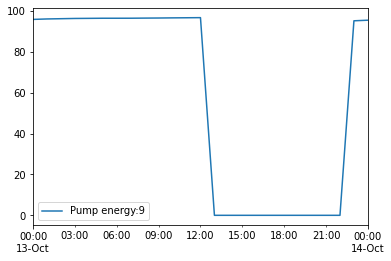

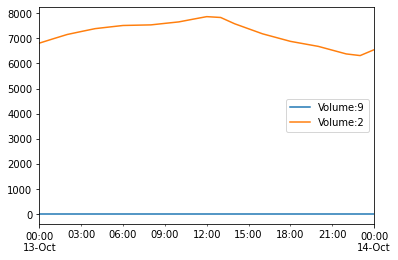

In [7]:
pipe_query = QueryDataReach('Pump energy', pipe_id)
df_pipe = res.read(queries=[pipe_query])
df_pipe.plot();

node_start_query = QueryDataNode('Volume', node_start.ID)
node_end_query = QueryDataNode('Volume', node_end.ID)
df_nodes = res.read(queries=[node_start_query, node_end_query])
df_nodes.plot();